# Taxi Fare Prediction 🚖💰

This project aims to predict taxi fares in New York City using various machine learning models. The dataset includes features such as pickup and dropoff locations, passenger count, and time of day.


# Importing Libraries 📘
We will be using Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn for data manipulation, visualization, and modeling.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Loading the Dataset 📥
Let's load the dataset and take a quick look at the first few rows to understand its structure.


## Create 'data' directory to store the datasets

In [ ]:
!mkdir -p data

## Using HuggingFace

### Downloading the dataset

In [ ]:
# Dataset name
REPO_ID = "ElvisGitau/Uber-Fare-Predict"
FILENAME = "final.csv"

# Directory to store the dataset
DATA_DIR = "data"

# Destination directory for the specific dataset
DESTINATION_DIR = f"{DATA_DIR}/{REPO_ID}"

# Final file path
DESTINATION_PATH = f"{DESTINATION_DIR}/{FILENAME}"

# Create the destination directory if it doesn't exist
!mkdir -p "{DESTINATION_DIR}"

# Print the destination directory
print(f"Destination Directory: {DESTINATION_DIR}")

# Download the file from Hugging Face using curl
!curl -L -o "{DESTINATION_PATH}" "https://huggingface.co/datasets/{REPO_ID}/resolve/main/{FILENAME}"


Destination Directory: data/ElvisGitau/Uber-Fare-Predict
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159  100  1159    0     0   3240      0 --:--:-- --:--:-- --:--:--  3246
100  162M  100  162M    0     0  34.8M      0  0:00:04  0:00:04 --:--:-- 40.6M


### Loading data into a DataFrame

In [ ]:
df = pd.read_csv(DESTINATION_PATH)

# Display first few rows
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


# Data Cleaning 🧹
We will clean the data by handling missing values, removing outliers, and converting columns into usable formats such as date-time and distance.


In [ ]:
# Handle Missing Values
# Drop rows with missing values
df = df.dropna()

# Check the number of rows after dropping
print(f'Number of rows after dropping missing values: {df.shape[0]}')


Number of rows after dropping missing values: 499995


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['User ID', 'User Name', 'Driver Name', 'key'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert 'pickup_datetime' to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Check the changes
print(df.dtypes)


Missing values:
 Car Condition        0
Weather              0
Traffic Condition    0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64
Car Condition                object
Weather                      object
Traffic Condition            object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
hour                          int64
day                           int64
month                         in

# Exploratory Data Analysis (EDA)  🔍
We will explore the dataset to identify patterns, detect missing values, and understand the relationship between features and the target (fare).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

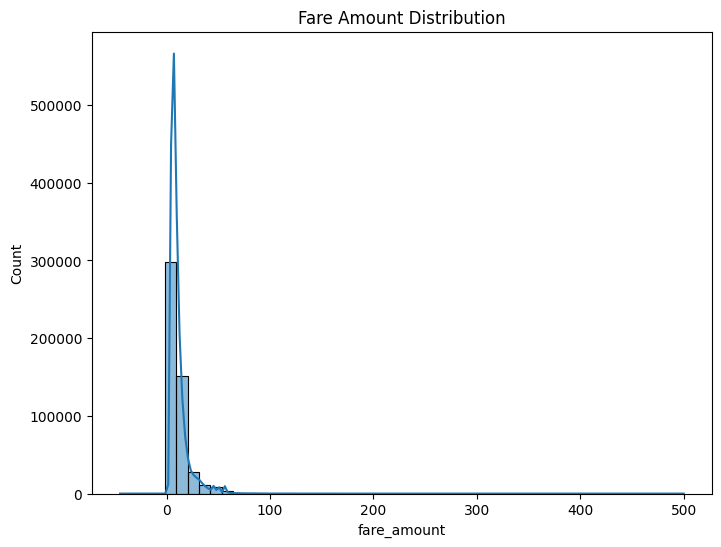

In [ ]:
# Check data summary
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()

# Visualize distribution of fares
plt.figure(figsize=(8, 6))
sns.histplot(df['fare_amount'], kde=True, bins=50)
plt.title('Fare Amount Distribution')
plt.show()


<Axes: title={'center': 'Car condition distribuion'}, xlabel='Car Condition'>

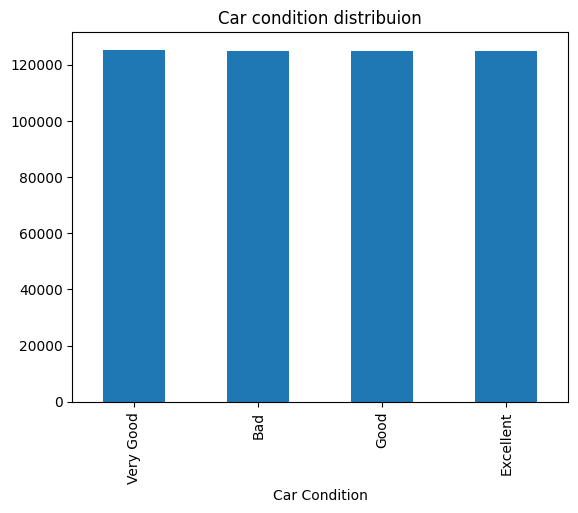

In [ ]:
# Visualize distribution of Car condition
df['Car Condition'].value_counts().plot(kind = 'bar', title = 'Car condition distribuion')
#plt.figure(figsize=(8, 6))
#sns.histplot(df['Car Condition'], kde=True, bins=10)
#plt.title('Car Condition Distribution')
#lt.show()

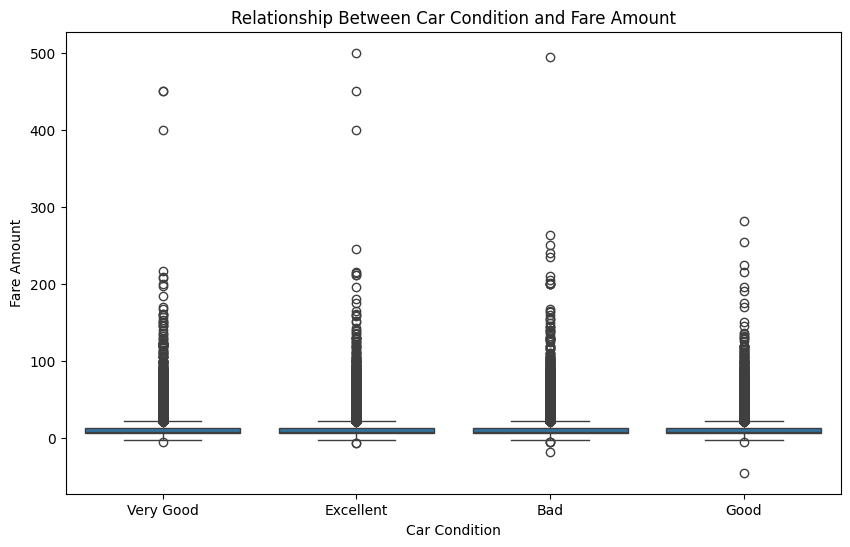

In [ ]:
#Relationship between car condition and fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Car Condition', y='fare_amount', data=df)
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')
plt.title('Relationship Between Car Condition and Fare Amount')
plt.show()

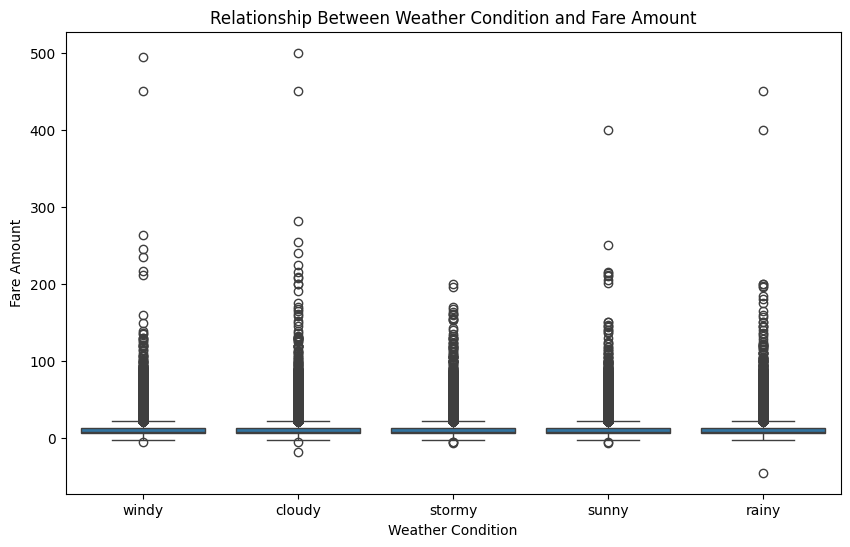

In [ ]:
#Relationship between Weather condition and fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.xlabel('Weather Condition')
plt.ylabel('Fare Amount')
plt.title('Relationship Between Weather Condition and Fare Amount')
plt.show()

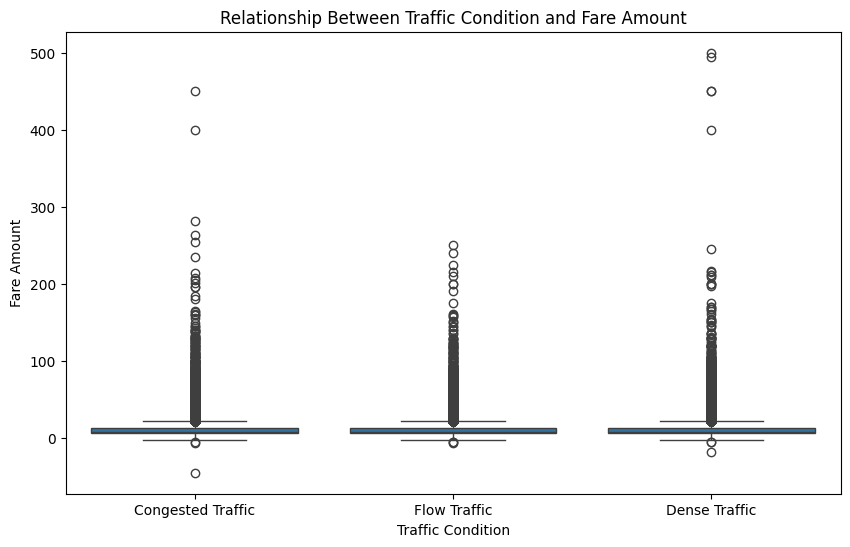

In [ ]:
#Relationship between Traffic condition and fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Condition', y='fare_amount', data=df)
plt.xlabel('Traffic Condition')
plt.ylabel('Fare Amount')
plt.title('Relationship Between Traffic Condition and Fare Amount')
plt.show()

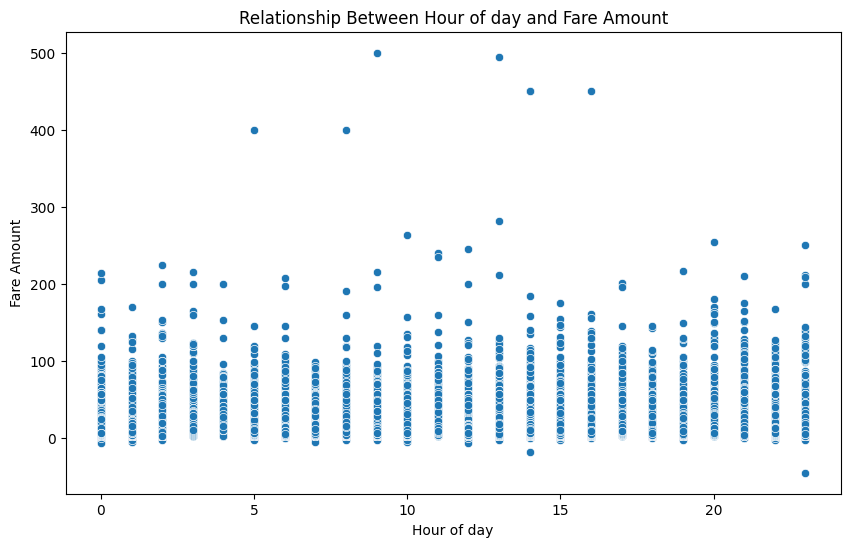

In [ ]:
#Relationship between hour of day and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='fare_amount', data=df)
plt.xlabel('Hour of day')
plt.ylabel('Fare Amount')
plt.title('Relationship Between Hour of day and Fare Amount')
plt.show()

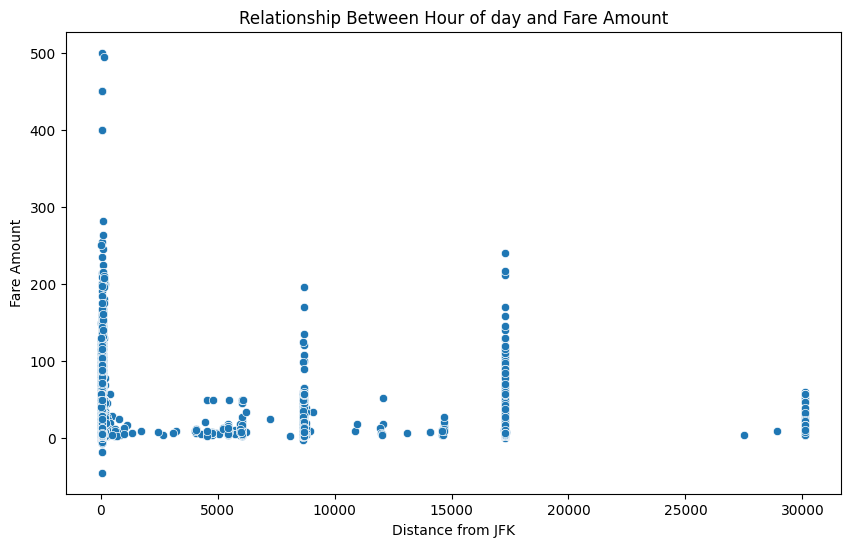

In [ ]:
#Relationship between jfk distance and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jfk_dist', y='fare_amount', data=df)
plt.xlabel('Distance from JFK')
plt.ylabel('Fare Amount')
plt.title('Relationship Between Hour of day and Fare Amount')
plt.show()

In [ ]:
#sns.pairplot(df)
plt.suptitle('Scatter Plots for All Pairs of Numerical Columns', y=1.02)
